##To classify the type of the glass from the elements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
feature_cols =['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = data[feature_cols] # Features
y = data.Type # Target variable

In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

**Data Visulization**

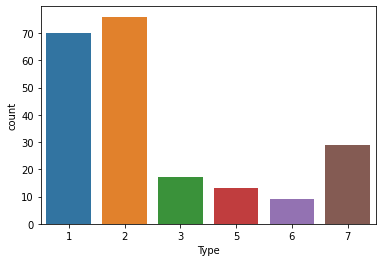

In [8]:
sns.countplot(data['Type'])
plt.show()

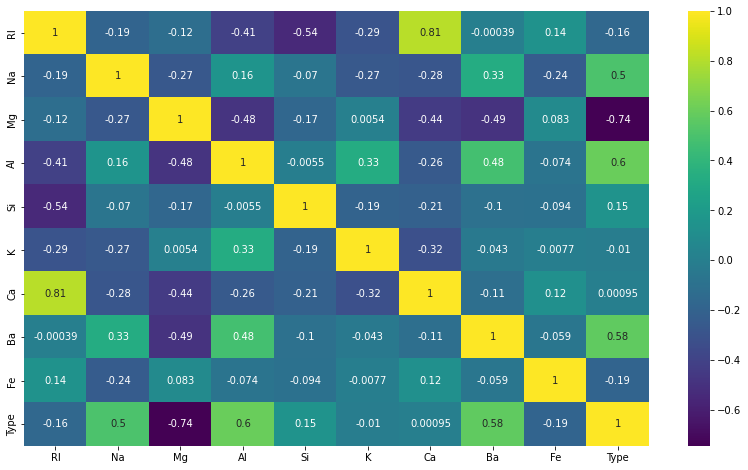

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [13]:
#Splitting a dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.1
202,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.0
27,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.0
58,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.00,0.0
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.0
...,...,...,...,...,...,...,...,...,...
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.0
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.0
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.0
140,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.0


In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True,with_mean=True,with_std=True)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
X_test.shape, X_train.shape

((43, 9), (171, 9))

In [17]:
X_train

array([[ 3.11822871,  0.70984522,  0.71823531, ...,  0.72309469,
        -0.3708268 ,  0.43352211],
       [-1.11919497,  1.76674346, -1.88787514, ..., -0.36101533,
         0.77837626, -0.58198858],
       [-0.35844328, -0.66658038,  0.56327739, ..., -0.33069058,
        -0.3708268 , -0.58198858],
       ...,
       [-0.82885978, -0.39621107,  0.64075635, ..., -0.78556192,
        -0.3708268 , -0.58198858],
       [-0.47237228, -0.10126272,  0.60553864, ..., -0.57328863,
        -0.3708268 , -0.58198858],
       [-0.07913348, -0.82634407,  0.56327739, ..., -0.14116085,
        -0.3708268 , -0.58198858]])

In [18]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
 
logreg = LogisticRegression(multi_class='multinomial')
 
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [19]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  6,  0,  0,  0,  0],
       [ 1,  9,  0,  1,  1,  0],
       [ 3,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  4]])

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.76      0.68      0.72        19
           2       0.50      0.75      0.60        12
           3       0.00      0.00      0.00         6
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         4

    accuracy                           0.65        43
   macro avg       0.54      0.74      0.61        43
weighted avg       0.59      0.65      0.61        43



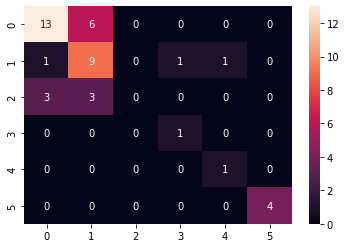

In [23]:
sns.heatmap(cnf_matrix, annot=True)